In [1]:
import glob

files = glob.glob("atc-tracking-part1/*")

In [11]:
import pandas as pd
df = pd.read_csv("atc-tracking-part1/atc-20121024.csv")
df.columns = ["time", "id", "pos_x", "pos_y", "pos_z", "v", "v_angle", "h_angle"]
df.iloc[:,4:] = df.iloc[:,4:].astype('float16')
print(df.shape)
#for i in files[1:2]:
df2 = pd.read_csv(files[1])
df2.iloc[:,4:] = df2.iloc[:,4:].astype('float16')
df2.columns = ["time", "id", "pos_x", "pos_y", "pos_z", "v", "v_angle", "h_angle"]
df = pd.concat([df, df2])
df2 = pd.read_csv(files[2])
df2.iloc[:,4:] = df2.iloc[:,4:].astype('float16')
df2.columns = ["time", "id", "pos_x", "pos_y", "pos_z", "v", "v_angle", "h_angle"]
df = pd.concat([df, df2])
#    print(df.shape)
#    df.iloc[:,4:] = df.iloc[:,4:].astype('float16')
del df2
df

(16817748, 8)


,time,id,pos_x,pos_y,pos_z,v,v_angle,h_angle
0,1.351038e+09,9190700,26636,-15107,1580.0,668.0,3.095703,3.138672
1,1.351038e+09,9190802,-22342,1687,874.5,601.5,-1.358398,-1.381836
2,1.351038e+09,9194800,3658,-320,2138.0,696.0,-0.400879,-0.262939
3,1.351038e+09,9200100,42021,-17560,1856.0,536.0,-0.914062,-1.063477
4,1.351038e+09,9201900,46605,-22013,1827.0,1176.0,1.643555,1.606445
...,...,...,...,...,...,...,...,...
40957063,1.351424e+09,20304401,-22913,1063,976.5,573.5,-2.271484,-2.085938
40957064,1.351424e+09,20305100,-7904,-10517,1210.0,668.5,1.834961,1.855469
40957065,1.351424e+09,20310300,42596,-22922,1717.0,1238.0,2.777344,2.878906
40957066,1.351424e+09,20310301,-23305,1280,1403.0,568.5,-0.204956,-0.177002


## Columns

time [ms] (unixtime + milliseconds/1000), person id, position x [mm], position y [mm], position z (height) [mm], velocity [mm/s], angle of motion [rad], facing angle [rad]

In [3]:
df.columns = ["time", "id", "pos_x", "pos_y", "pos_z", "v", "v_angle", "h_angle"]
#df.time = 
df

ValueError: Length mismatch: Expected axis has 16 elements, new values have 8 elements

In [6]:
df.iloc[:,4:] = df.iloc[:,4:].astype('float16')

In [12]:
df.dtypes

time       float64
id           int64
pos_x        int64
pos_y        int64
pos_z      float16
v          float16
v_angle    float16
h_angle    float16
dtype: object

/home/bencesipos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


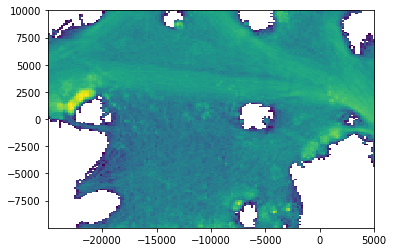

In [41]:
%matplotlib inline
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

## Generate some test data
#x = np.random.randn(8873)
#y = np.random.randn(8873)


mask = (df['pos_y'] > -10000) & (df['pos_y'] <= 10000)
df1 = df.loc[mask]
mask = (df1['pos_x'] > -25000) & (df1['pos_x'] <= 5000)
df1 = df1.loc[mask]

heatmap, xedges, yedges = np.histogram2d(df1.pos_x, df1.pos_y, bins=150)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(np.log(heatmap).T, extent=extent, origin='lower')
plt.show()

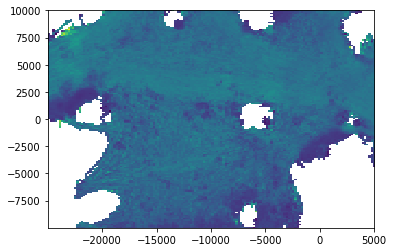

In [59]:
plt.clf()
#means = means.iloc[::-1]
plt.imshow((means['v'].astype("float").values), extent=extent, origin='lower')
plt.show()
#means['v'].astype("float").values

In [60]:
df1["v_x"] = df1.v.values*np.cos(df1.v_angle.values)
df1["v_y"] = df1.v.values*np.sin(df1.v_angle.values)

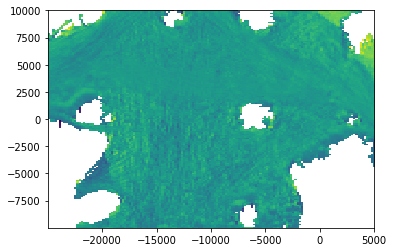

In [62]:
plt.clf()
means = means.iloc[::-1]
plt.imshow((means['v_y'].astype("float").values), extent=extent, origin='lower')
plt.show()

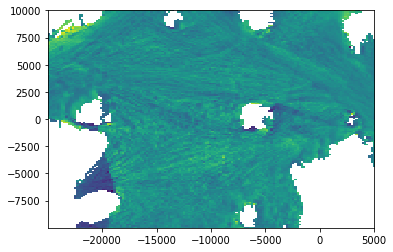

In [64]:
plt.clf()
means = means.iloc[::-1]
plt.imshow((means['v_x'].astype("float").values), extent=extent, origin='lower')
plt.show()

at first cuts are pandas intervalindex.
                   pos_x_bin             pos_y_bin
1   (-22399.087, -22199.093]   (1600.42, 1733.747]
2        (3600.047, 3800.04]   (-399.48, -266.153]
7   (-22399.087, -22199.093]   (1600.42, 1733.747]
8        (3600.047, 3800.04]   (-399.48, -266.153]
13  (-22399.087, -22199.093]  (1733.747, 1867.073]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4062148 entries, 1 to 16817747
Data columns (total 2 columns):
pos_x_bin    category
pos_y_bin    category
dtypes: category(2)
memory usage: 206.5 MB
None


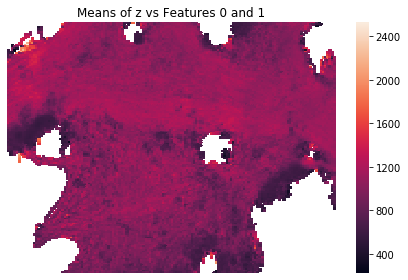

In [61]:
cuts = pd.DataFrame({str(feature) + '_bin' : pd.cut(df1[feature], 150) for feature in ["pos_x", "pos_y"]})
print('at first cuts are pandas intervalindex.')
print(cuts.head())
print(cuts.info())
means = df1.join(cuts).groupby( list(cuts) ).mean()
means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.

means = means.iloc[::-1]

plt.clf()
sns.heatmap(means['v']) 
plt.title('Means of z vs Features 0 and 1')
plt.axis('off')
plt.tight_layout()

Generating Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
0    1000 non-null float64
1    1000 non-null float64
z    1000 non-null float64
dtypes: float64(3)
memory usage: 23.6 KB
None


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/density.svg'

<Figure size 432x288 with 0 Axes>

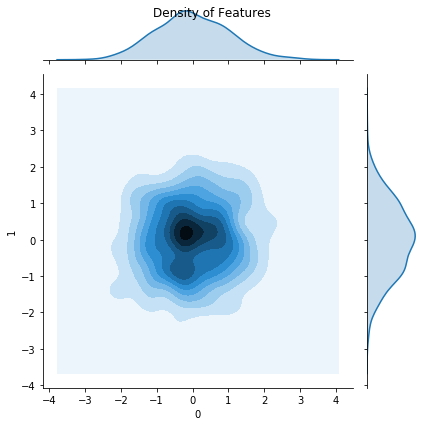

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Use a seed to have reproducible results.

np.random.seed(20190121)
nSamples = 1000 
nCut = 10

def zFunction(X):
    # z = x - y
    return X[:, 0] - X[:, 1]

print('Generating Data')
data = np.random.normal(size = (nSamples, 2))
data = pd.DataFrame(data)
data['z'] = zFunction(data.values)
print(data.info())
      
plt.clf()
sns.jointplot(data[0], data[1], kind = 'kde')
plt.gcf().suptitle('Density of Features')
plt.tight_layout()
#plt.savefig('graphs/density.svg')

at first cuts are pandas intervalindex.
              0Bin              1Bin
0  (-0.476, 0.148]  (-1.012, -0.387]
1   (-1.1, -0.476]    (0.237, 0.861]
2   (0.148, 0.773]    (0.237, 0.861]
3   (0.773, 1.397]    (0.237, 0.861]
4   (0.773, 1.397]  (-1.012, -0.387]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
0Bin    1000 non-null category
1Bin    1000 non-null category
dtypes: category(2)
memory usage: 3.0 KB
None
                              0                                  \
0Bin           (-2.979, -2.349] (-2.349, -1.725] (-1.725, -1.1]   
1Bin                                                              
(2.735, 3.359]              NaN              NaN            NaN   
(2.11, 2.735]               NaN              NaN      -1.390831   
(1.486, 2.11]               NaN              NaN      -1.412612   
(0.861, 1.486]              NaN        -1.810507      -1.401068   
(0.237, 0.861]        -2.973171        -1.925303      -1

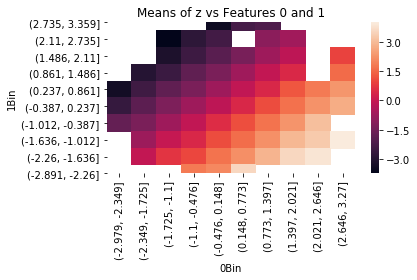

In [45]:
cuts = pd.DataFrame({str(feature) + 'Bin' : pd.cut(data[feature], nCut) for feature in [0, 1]})
print('at first cuts are pandas intervalindex.')
print(cuts.head())
print(cuts.info())
means = data.join(cuts).groupby( list(cuts) ).mean()
means = means.unstack(level = 0) # Use level 0 to put 0Bin as columns.

# Reverse the order of the rows as the heatmap will print from top to bottom.
means = means.iloc[::-1]
print(means.head())
print(means['z'])
plt.clf()
sns.heatmap(means['z']) 
plt.title('Means of z vs Features 0 and 1')
plt.tight_layout()

In [16]:
df.to_parquet("1-3.pk")

ArrowNotImplementedError: Unhandled type for Arrow to Parquet schema conversion: halffloat

In [15]:
!pip install pyarrow

     |████████████████████████████████| 17.9MB 447kB/s eta 0:00:01


In [18]:
#df = pd.read_parquet("test.pk")#.time.astype("")
df.time = pd.to_datetime(df.time, unit='s')
#df.time

In [43]:
df["h_angle"]<0

0           False
1           False
2            True
3           False
4           False
            ...  
15606035     True
15606036     True
15606037     True
15606038    False
15606039    False
Name: h_angle, Length: 15606040, dtype: bool

In [20]:
len(df.id.unique())

60767

In [34]:
import pandas as pd
df = pd.read_csv("atc-tracking-part1/atc-20121024.csv")
df.columns = ["time", "id", "pos_x", "pos_y", "pos_z", "v", "v_angle", "h_angle"]
df.iloc[:,4:] = df.iloc[:,4:].astype('float16')

In [35]:
#df["SUBMISSION_DATE"] = pd.to_datetime(df["SUBMISSION_DATE"],dayfirst=True)
#v	v_angle
gs = df.groupby(["id"])["v"]
df["dv"] = gs.diff().fillna(0) #/ pd.datetools.timedelta(hours=1)
gs = df.groupby(["id"])["v_angle"]
df["dv_angle"] = gs.diff().fillna(0)
df

,time,id,pos_x,pos_y,pos_z,v,v_angle,h_angle,dv,dv_angle
0,1.351038e+09,9190700,26636,-15107,1580.0,668.0,3.095703,3.138672,0.0,0.000000
1,1.351038e+09,9190802,-22342,1687,874.5,601.5,-1.358398,-1.381836,0.0,0.000000
2,1.351038e+09,9194800,3658,-320,2138.0,696.0,-0.400879,-0.262939,0.0,0.000000
3,1.351038e+09,9200100,42021,-17560,1856.0,536.0,-0.914062,-1.063477,0.0,0.000000
4,1.351038e+09,9201900,46605,-22013,1827.0,1176.0,1.643555,1.606445,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
16817743,1.351078e+09,20272300,47134,-23381,1434.0,825.5,1.850586,1.860352,-14.0,-0.106445
16817744,1.351078e+09,20192100,-22717,1510,1159.0,632.5,2.953125,2.931641,9.5,-0.005859
16817745,1.351078e+09,20260000,-22165,1634,1065.0,651.0,-0.458984,-0.483887,-43.5,0.020996
16817746,1.351078e+09,20272300,47132,-23343,1434.0,817.0,1.820312,1.837891,-8.5,-0.030273


In [12]:
df = df.loc[abs(df.dv_angle)<2.5] 

/home/bencesipos/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


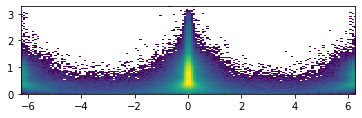

In [36]:
#df_1 = df.loc[df["id"]==9190700]

%matplotlib inline
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

## Generate some test data
#x = np.random.randn(8873)
#y = np.random.randn(8873)

heatmap, xedges, yedges = np.histogram2d(df.dv_angle, df.v/50*0.033, bins=150)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(np.log(heatmap).T, extent=extent, origin='lower')
plt.show()

In [29]:
df.loc[df.id == 9190700].time.diff().describe()

count    913.000000
mean       0.037953
std        0.003132
min        0.033000
25%        0.037000
50%        0.038000
75%        0.039000
max        0.078000
Name: time, dtype: float64

In [30]:
1/0.033

30.3030303030303

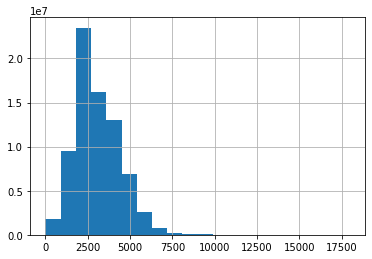

In [19]:
(df.v*3.6).hist(bins = 20)

In [34]:
mask = (df['time'] > '2012-11-14 00:33:08') & (df['time'] <= '2012-11-14 00:35:18')
print(df.loc[mask].id.unique())

[9330400 9330600 9315400 9331400 9331600 9332600 9333700 9333701 9334200
 9335400 9335700 9335900 9342700 9344100 9344700 9345300 9345500 9345600
 9345700 9350000 9350001 9350200 9350201 9350400 9350500 9351200 9351201
 9351300 9351400 9351500 9351600 9351601]


In [65]:
#df1 = df[df.id == 9330400]
mask = (df['time'] > '2012-11-14 00:33:08') & (df['time'] <= '2012-11-14 00:40:18')
df1 = df.loc[mask]
df1["heading"] = 0
df1.loc[df1["h_angle"]<0,'heading'] = 1

import plotly.express as px

#df = px.data.gapminder().query("country=='Canada'")
fig = px.scatter(df1, x="pos_x", y="pos_y", color = "h_angle", title='traces', opacity = "time")
fig.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ValueError: 
    Invalid value of type 'builtins.str' received for the 'opacity' property of scattergl.marker
        Received value: 'time'

    The 'opacity' property is a number and may be specified as:
      - An int or float in the interval [0, 1]
      - A tuple, list, or one-dimensional numpy array of the above

In [68]:
(df['time']-df['time'][0]).astype("<M8[ns]")

TypeError: cannot astype a timedelta from [timedelta64[ns]] to [datetime64[ns]]

In [58]:
df1.loc[df1["h_angle"]<0,'heading'] = 1
df1['heading']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0         0
1         0
2         1
3         0
4         0
         ..
119478    0
119479    0
119480    0
119481    1
119482    1
Name: heading, Length: 119483, dtype: int64